Predicting the City-Cycle Fuel Consumption in Miles per Gallon of a Car

A Classification Problem

**Exploratory Data Analysis**

In [1]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing dataset and check data available

from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the file into a pandas DataFrame
# Replace 'your_file.csv' with the actual filename of the uploaded file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded file: {file_name}")

# Load the file into a DataFrame
mpg = pd.read_excel(file_name)

# Step 3: Display the first few rows of the DataFrame
print("\nData Preview:")
print(mpg.head())


Saving mpg.data.xlsx to mpg.data.xlsx
Uploaded file: mpg.data.xlsx

Data Preview:
    mpg  cylinders  displayments  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  Unnamed: 9  Unnamed: 10  \
0          70       1  chevrolet chevelle malibu         NaN          NaN   
1          70       1          buick skylark 320         NaN          NaN   
2          70       1         plymouth satellite         NaN          NaN   
3          70       1              amc rebel sst         NaN          NaN   
4          70       1                ford torino         NaN          NaN   

   Unnamed: 11 Unnamed: 12  
0    

In [3]:
# Get a concise summary of the dataframe.
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB


In [4]:
#  Insights into the distribution and summary statistics of the data.
mpg.describe()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000,0.0,0.0,0.0
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966,NaN,NaN,NaN
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000,NaN,NaN,NaN
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000,NaN,NaN,NaN
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000,NaN,NaN,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN,NaN,NaN


In [5]:
# Identify missing values in the dataframe and count the number of missing values per column.
mpg.isnull().sum()

,0
mpg,8
cylinders,0
displayments,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0
Unnamed: 9,406


In [6]:
# Drop unnecessary columns

mpg = mpg.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])
mpg.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
# Correctly renaming a column in the DataFrame

mpg = mpg.rename(columns={'displayments': 'displacement'})
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [8]:
# Mapping the origin column
# Origin 1 is for Usa , Origin 2 is for Europe and Origin 3 is for Asia.

# Defining mapping
origin_map = {1: 'USA', 2: 'Europe', 3: 'Asia'}

# Applying mapping
mpg['origin_label'] = mpg['origin'].map(origin_map)

# Replace the origin column
mpg['origin'] = mpg['origin'].replace(origin_map)
mpg.drop('origin_label', axis=1, inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


In [9]:
# Replace the two-digit year into a four-digit year.

mpg['model_year_full'] = mpg['model year'].apply(lambda x: 1900 + x if x >= 70 else 2000 + x)

#Replace the model year column and drop the new column
mpg['model year'] = mpg['model_year_full']
mpg.drop('model_year_full', axis=1, inplace=True)

Analyzing continuous variables

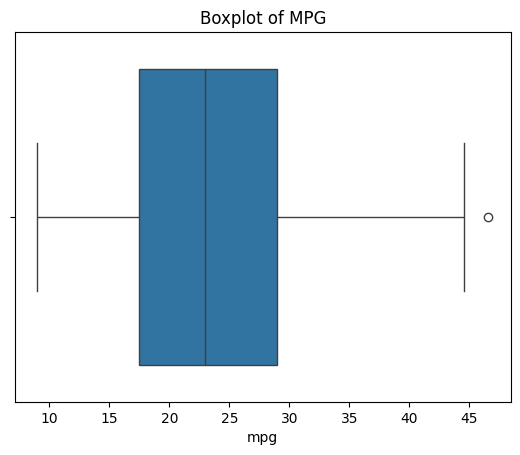

In [10]:
# Display the distribution, spread, and outliers of the mpg data.

sns.boxplot(x=mpg['mpg'])
plt.title("Boxplot of MPG")
plt.show()

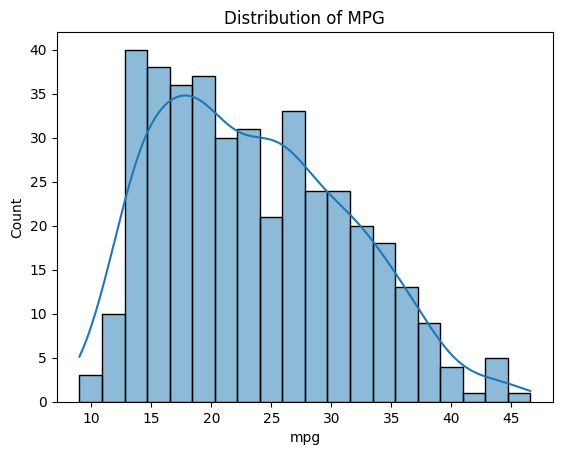

In [11]:
# Display the distribution of the mpg data by grouping values into bins and counting their occurrences.

sns.histplot(mpg['mpg'], kde=True, bins=20)
plt.title("Distribution of MPG")
plt.show()

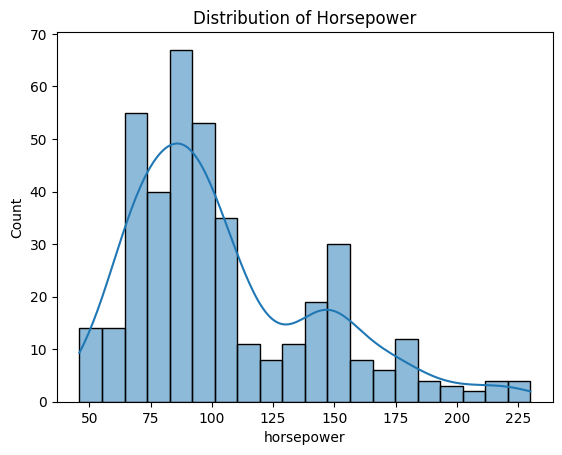

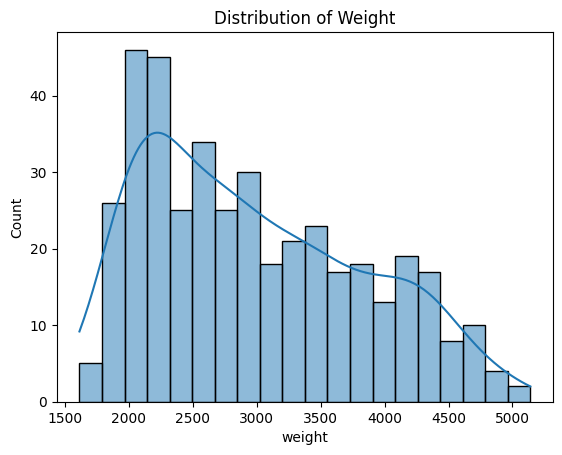

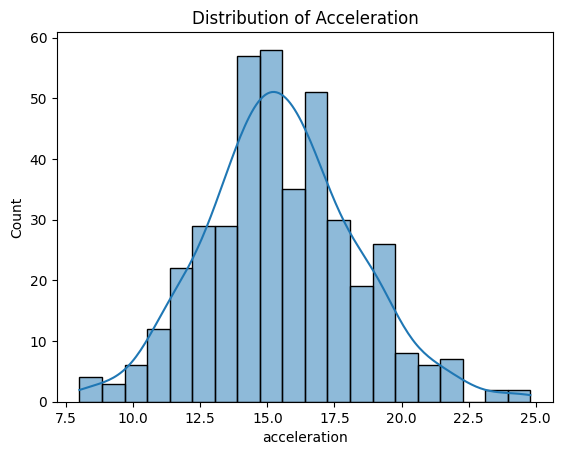

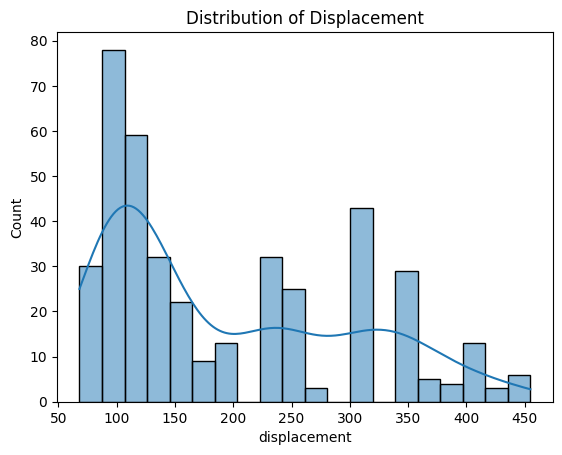

In [12]:
# Display the distribution of the data by grouping values into bins and counting their occurrences.
# Horsepower, weight, acceleration, displacement

for col in ['horsepower', 'weight', 'acceleration', 'displacement']:
    sns.histplot(mpg[col], kde=True, bins=20)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.show()

Analyzing categorical variables

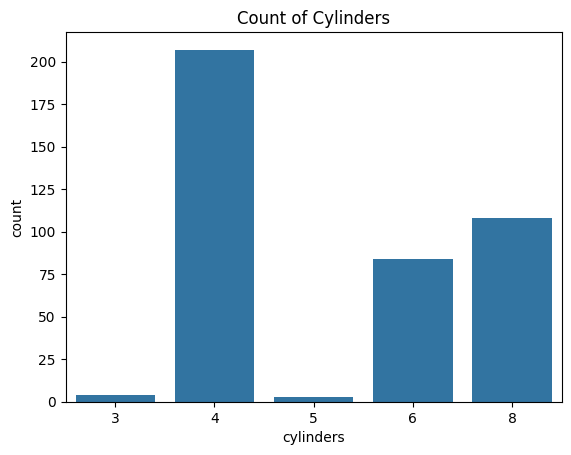

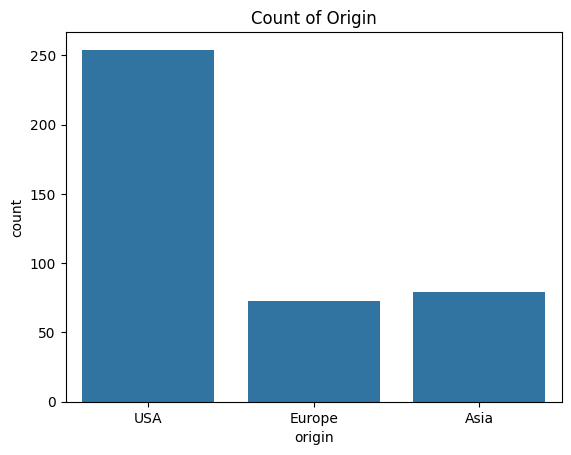

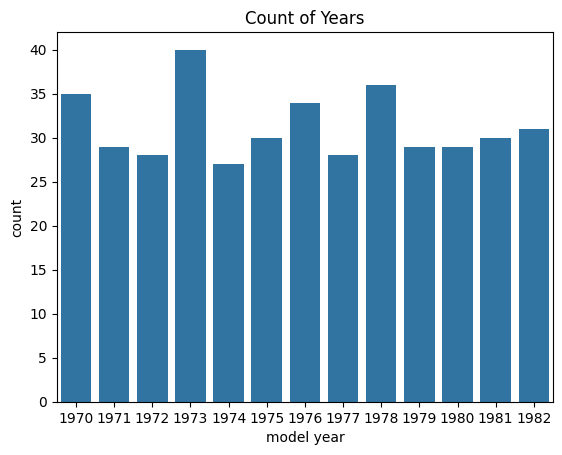

In [13]:
# Visualize the frequency of categorical data by showing the count of observations in each category.
# Cylinders
sns.countplot(x='cylinders', data=mpg)
plt.title("Count of Cylinders")
plt.show()

# Origin
sns.countplot(x='origin', data=mpg)
plt.title("Count of Origin")
plt.show()

# Model Year
sns.countplot(x='model year', data=mpg)
plt.title("Count of Years")
plt.show()

Trends in Fuel Efficiency and Horsepower Over Model Years

<ipython-input-14-ced690f6c888>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model year', y='mpg', data=mpg, ci=None)


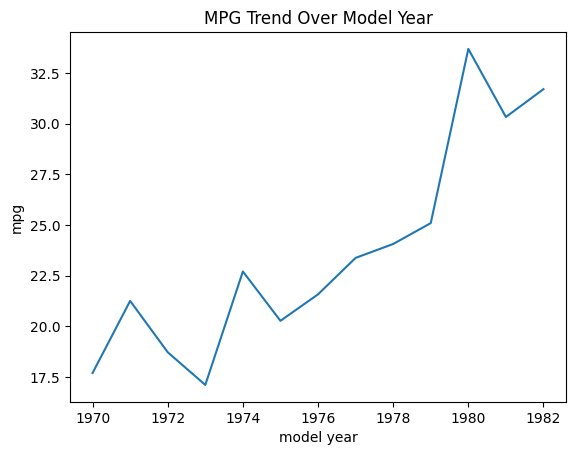

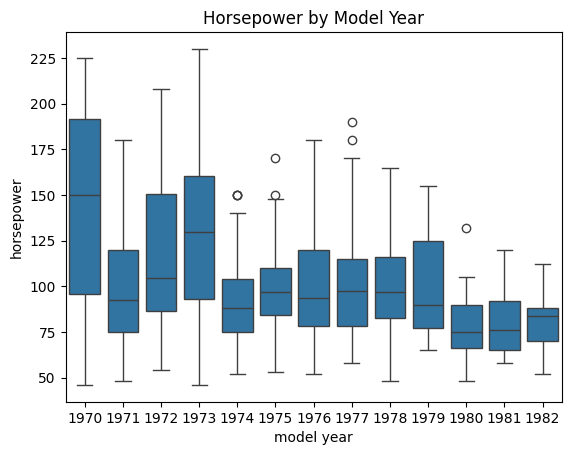

In [14]:
# Trend of mpg over model year
sns.lineplot(x='model year', y='mpg', data=mpg, ci=None)
plt.title("MPG Trend Over Model Year")
plt.show()

# Trends for other variables
sns.boxplot(x='model year', y='horsepower', data=mpg)
plt.title("Horsepower by Model Year")
plt.show()


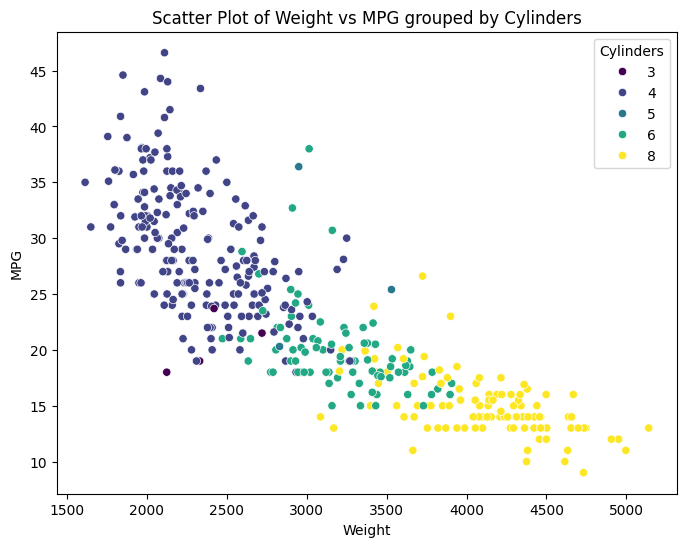

In [15]:
# Visualize the relationship between car weight and miles per gallon (MPG), while also grouping the points based on the number of cylinders
data = mpg[['weight', 'mpg', 'cylinders']]

# Visualization with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['weight'], y=data['mpg'], hue=data['cylinders'], palette='viridis')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot of Weight vs MPG grouped by Cylinders')
plt.legend(title='Cylinders')
plt.show()

Correlation of Key Car Attributes: MPG, Engine Size, Power, Weight, and Acceleration

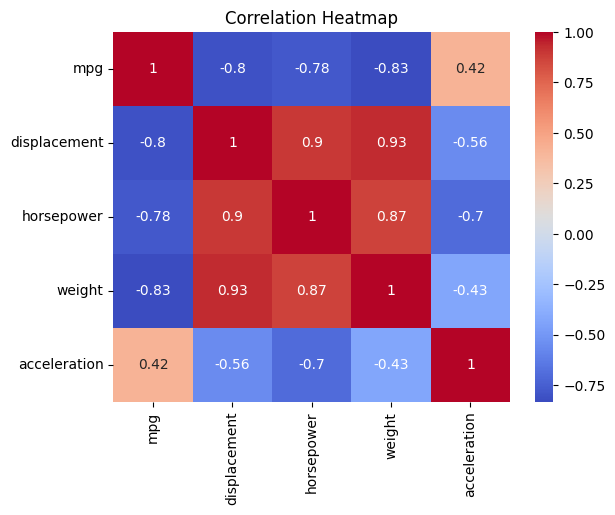

In [16]:
# Correlation heatmap
corr_matrix = mpg[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Relationships Between Key Car Performance Metrics

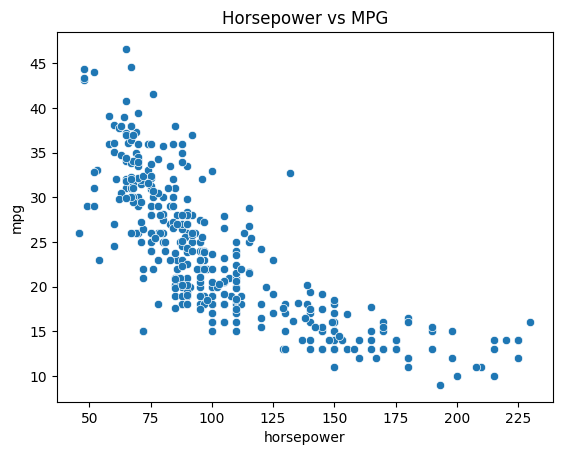

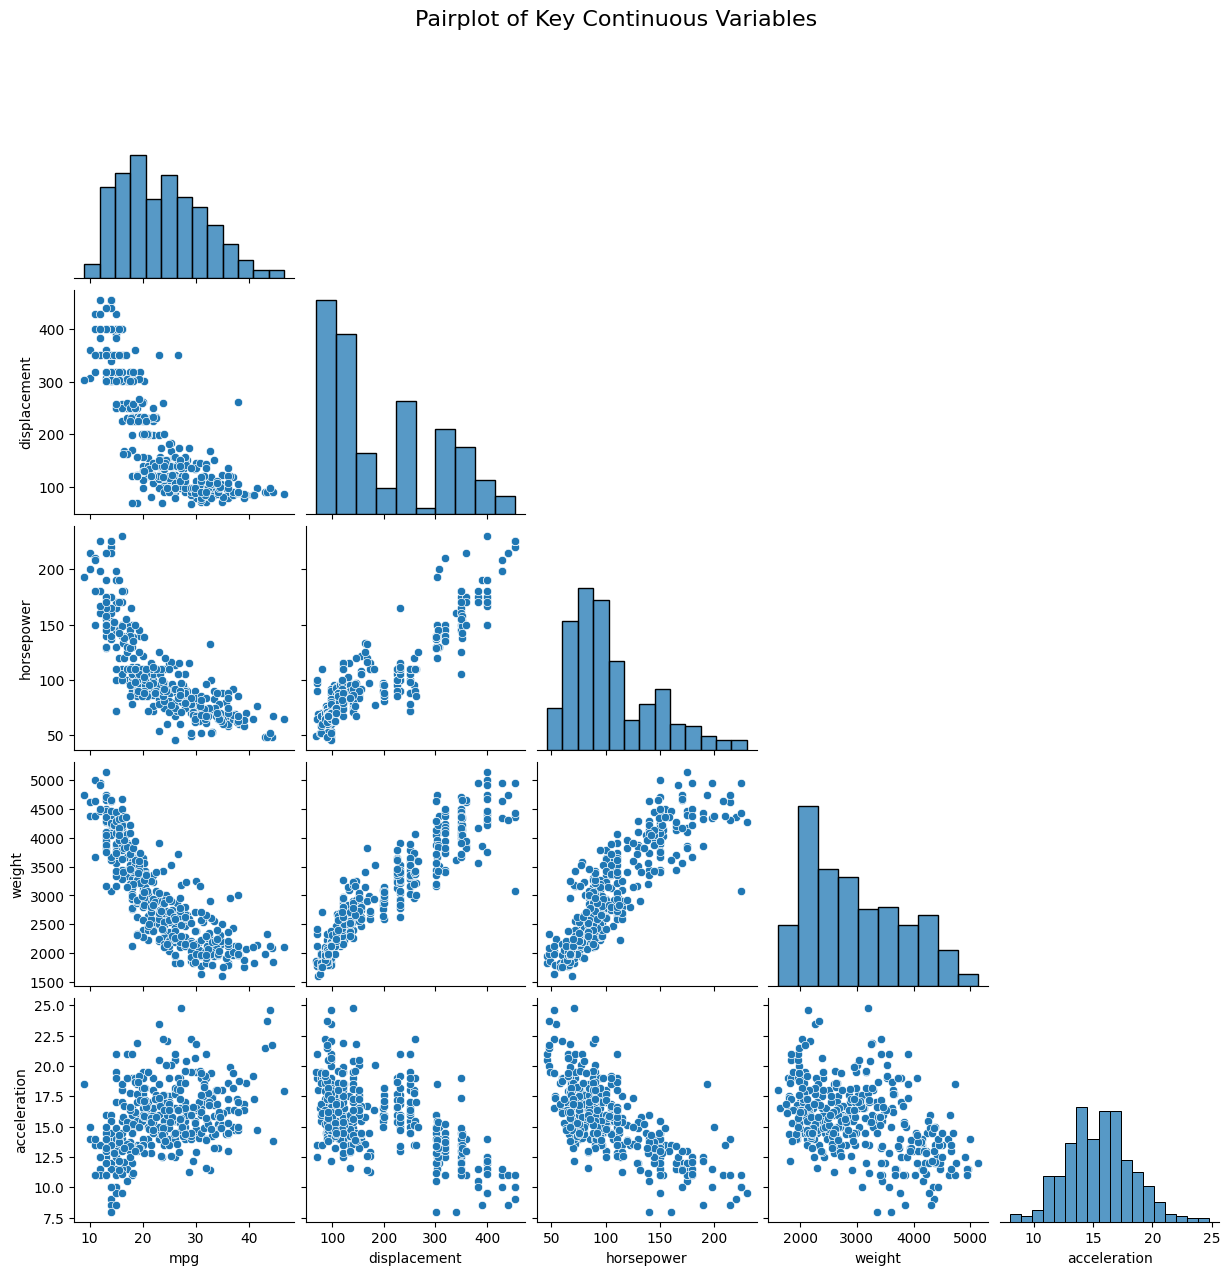

In [17]:
# Scatter plot between 'horsepower' and 'mpg'
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.title("Horsepower vs MPG")
plt.show()

# Pairplot for key continuous variables
sns.pairplot(mpg[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']], corner=True)
plt.suptitle("Pairplot of Key Continuous Variables", y=1.02, fontsize=16)
plt.show()


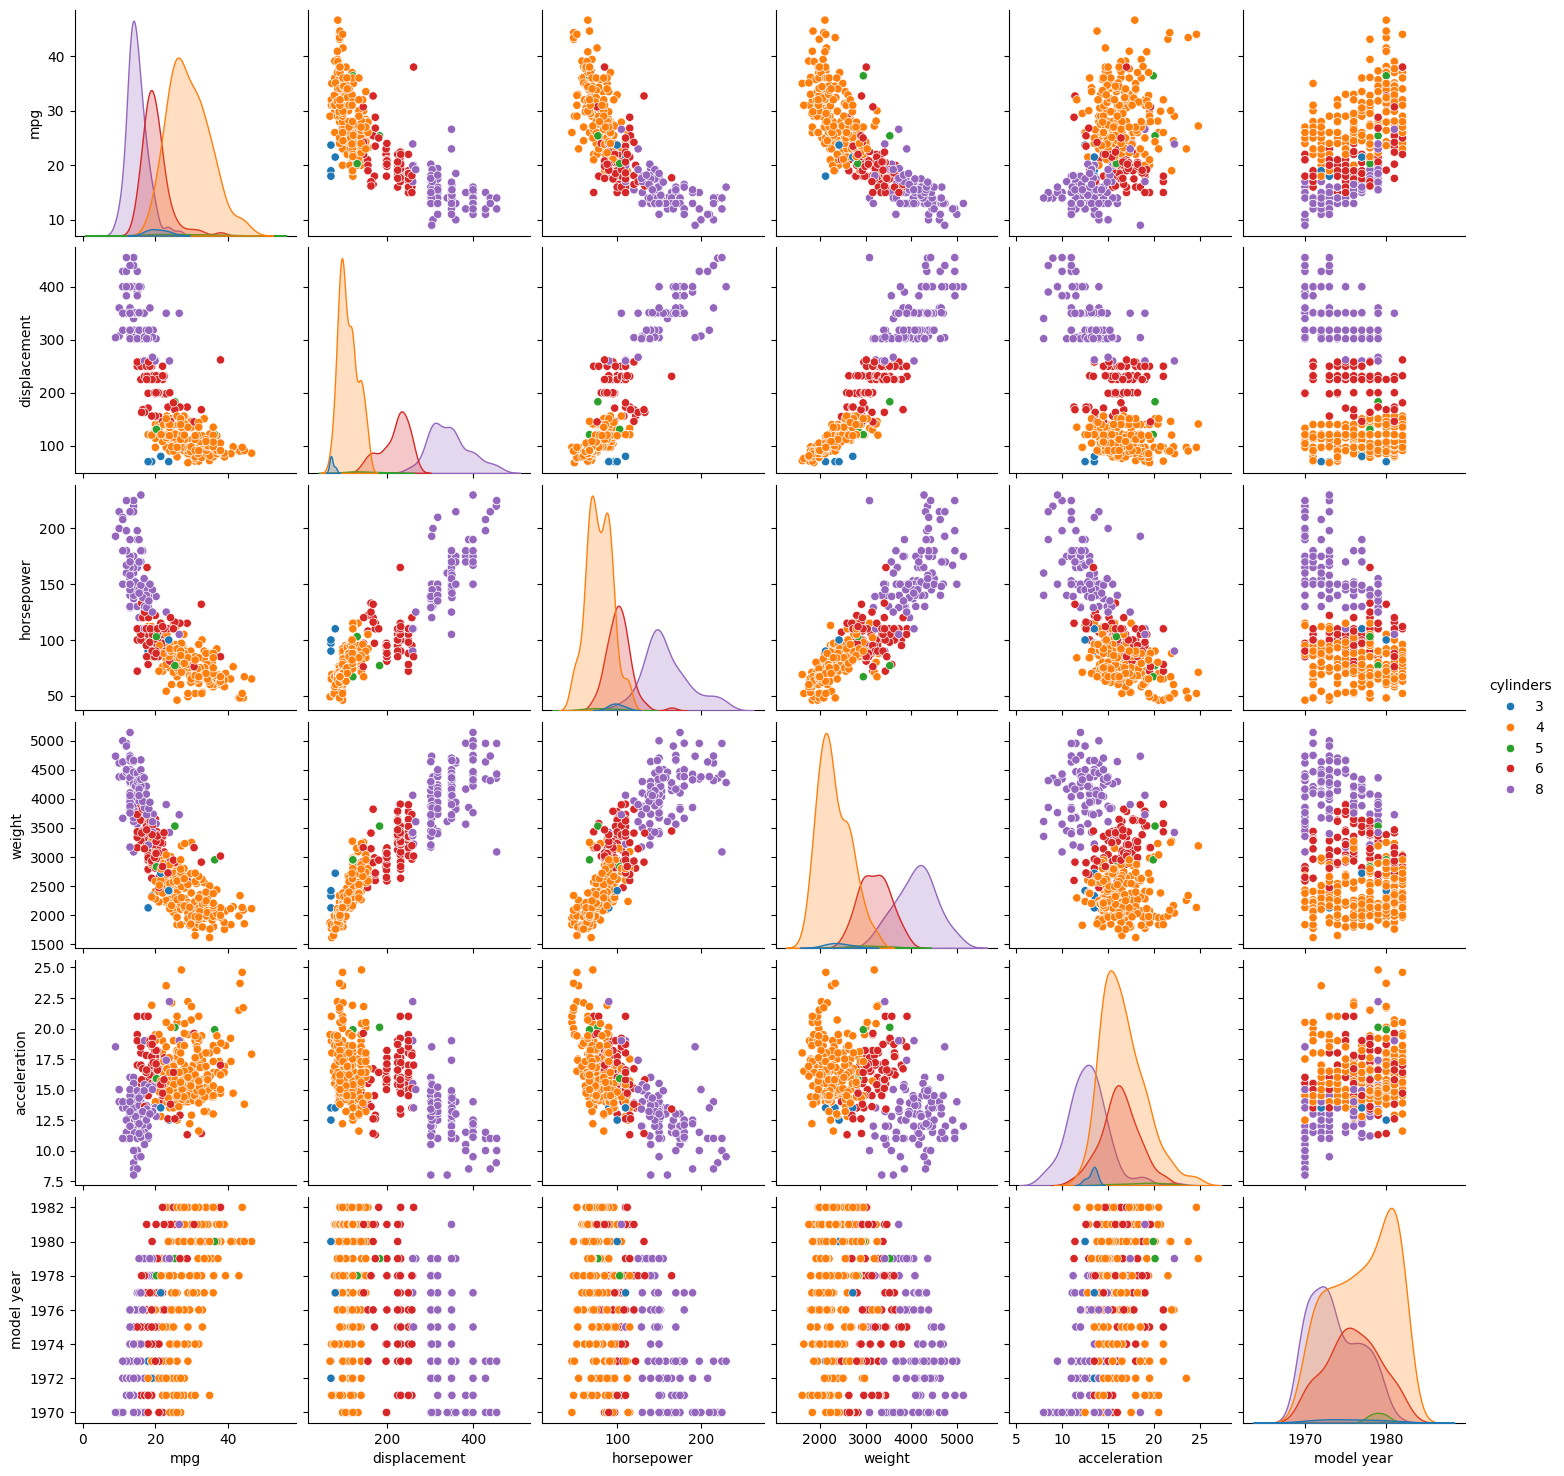

In [ ]:
# Pairplot of MPG Dataset by Cylinders
# Visualization using pairplot
sns.pairplot(mpg, hue="cylinders", palette="tab10")
plt.show()